Nie korzystać z SKlerna, 
korzystać z tensorflow
my projektujemy sieć neuronową
łatwy gradnient
TEnsor

Zdefiniwanie modelu
i forward

przetesowac optimazery
SGD - stochastyczny gradient


In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

# - TensorFlow - 
import matplotlib.pylab as plt

from ucimlrepo import fetch_ucirepo


# Przeprocesowanie zbioru danych

In [2]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
Y = heart_disease.data.targets

Y = Y['num'].replace([1, 2, 3, 4], 1)

X['num'] = Y

median = X['ca'].median()
X['ca'].fillna(median, inplace=True)
mode_category = X['thal'].mode()[0]
X['thal'].fillna(mode_category, inplace=True)

In [3]:
def one_hot_encode(df, column, column_names):
    dummies = pd.get_dummies(df[column], prefix=column)
    column_names = [column + '_' + str(name) for name in column_names]
    dummies.columns = column_names
    dummies = dummies.astype('int64')
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [4]:
X =  one_hot_encode(X, 'cp', ['typical_angina', 'atypical_angina', 'non-anginal_pain', 'asymptomatic'])
X = one_hot_encode(X, 'thal', ['normal', 'ST-T_wave_abnormality', 'left_ventricular_hypertrophy'])
X = one_hot_encode(X, 'slope', ['upsloping', 'flat', 'downsloping'])
X = one_hot_encode(X, 'restecg', ['normal', 'fixed_defect', 'reversable_defect'])

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   trestbps                           303 non-null    int64  
 3   chol                               303 non-null    int64  
 4   fbs                                303 non-null    int64  
 5   thalach                            303 non-null    int64  
 6   exang                              303 non-null    int64  
 7   oldpeak                            303 non-null    float64
 8   ca                                 303 non-null    float64
 9   num                                303 non-null    int64  
 10  cp_typical_angina                  303 non-null    int64  
 11  cp_atypical_angina                 303 non-null    int64  

In [6]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.663366,0.458746,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,9.038662,0.467299,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.934375,0.499120,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:

Y = X['num']
X = X.drop('num', axis=1)

X_norm = (X - X.min()) / (X.max() - X.min())
X_norm.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_typical_angina,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.355564,0.275555,0.148515,0.600055,0.326733,0.167678,0.221122,0.075908,...,0.475248,0.554455,0.059406,0.386139,0.468647,0.462046,0.069307,0.498350,0.013201,0.488449
std,0.188305,0.467299,0.166035,0.118212,0.356198,0.174618,0.469794,0.187270,0.311458,0.265288,...,0.500213,0.497848,0.236774,0.487668,0.499842,0.499382,0.254395,0.500824,0.114325,0.500693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.262557,0.000000,0.625954,0.000000,0.129032,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,0.725191,1.000000,0.258065,0.333333,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Regreacja modelu z wykorzystaniem pytorch

SGD
Epoch 100/1000, Loss: 0.8277
Epoch 200/1000, Loss: 0.7124
Epoch 300/1000, Loss: 0.7000
Epoch 400/1000, Loss: 0.6907
Epoch 500/1000, Loss: 0.6975
Epoch 600/1000, Loss: 0.6909
Epoch 700/1000, Loss: 0.7083
Epoch 800/1000, Loss: 0.6966
Epoch 900/1000, Loss: 0.5915
Epoch 1000/1000, Loss: 0.6835


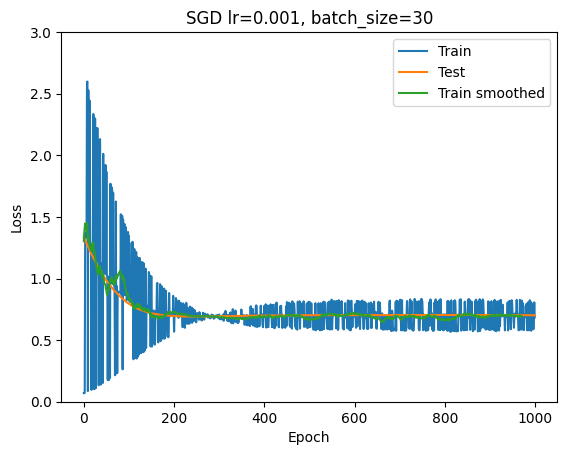

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4754
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
----------------------------------------
Adam
Epoch 100/1000, Loss: 0.3436
Epoch 200/1000, Loss: 0.1392
Epoch 300/1000, Loss: 0.3364
Epoch 400/1000, Loss: 0.7133
Epoch 500/1000, Loss: 0.3227
Epoch 600/1000, Loss: 0.0324
Epoch 700/1000, Loss: 0.1500
Epoch 800/1000, Loss: 0.0341
Epoch 900/1000, Loss: 0.0568
Epoch 1000/1000, Loss: 0.0567


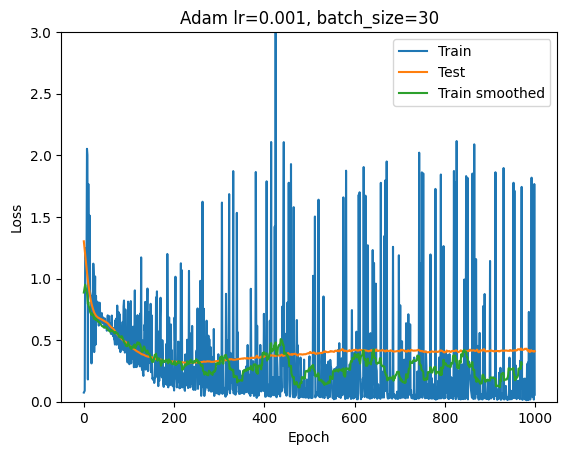

Accuracy: 0.8361
F1 Score: 0.8485
Precision: 0.8235
Recall: 0.8750
----------------------------------------
Adagrad
Epoch 100/1000, Loss: 1.1607
Epoch 200/1000, Loss: 1.0817
Epoch 300/1000, Loss: 0.9723
Epoch 400/1000, Loss: 0.9150
Epoch 500/1000, Loss: 0.8617
Epoch 600/1000, Loss: 0.8773
Epoch 700/1000, Loss: 0.8447
Epoch 800/1000, Loss: 0.8505
Epoch 900/1000, Loss: 1.2554
Epoch 1000/1000, Loss: 0.7706


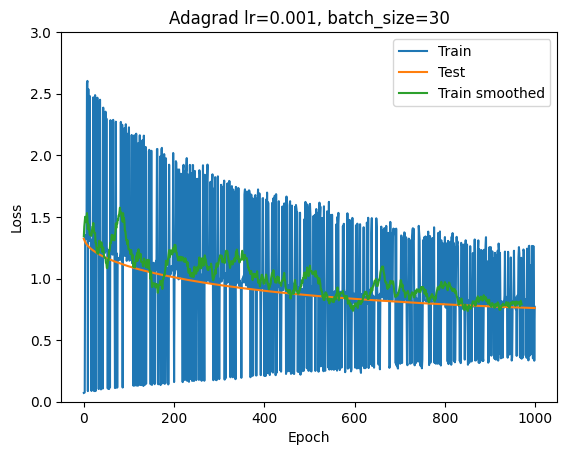

Accuracy: 0.5246
F1 Score: 0.6882
Precision: 0.5246
Recall: 1.0000
----------------------------------------
ADAM: batch_size 10
Epoch 100/1000, Loss: 0.0905
Epoch 200/1000, Loss: 0.0332
Epoch 300/1000, Loss: 0.0822
Epoch 400/1000, Loss: 0.2200
Epoch 500/1000, Loss: 0.0790
Epoch 600/1000, Loss: 0.0155
Epoch 700/1000, Loss: 0.0466
Epoch 800/1000, Loss: 0.0169
Epoch 900/1000, Loss: 0.0285
Epoch 1000/1000, Loss: 0.0180


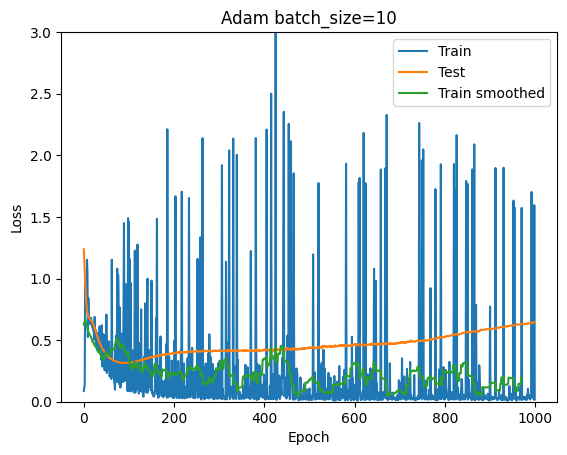

Accuracy: 0.7869
F1 Score: 0.8000
Precision: 0.7879
Recall: 0.8125
----------------------------------------
ADAM: batch_size 100
Epoch 100/1000, Loss: 0.6648
Epoch 200/1000, Loss: 0.5303
Epoch 300/1000, Loss: 0.3983
Epoch 400/1000, Loss: 0.3578
Epoch 500/1000, Loss: 0.4712
Epoch 600/1000, Loss: 0.2900
Epoch 700/1000, Loss: 0.2769
Epoch 800/1000, Loss: 0.2368
Epoch 900/1000, Loss: 0.1299
Epoch 1000/1000, Loss: 0.1006


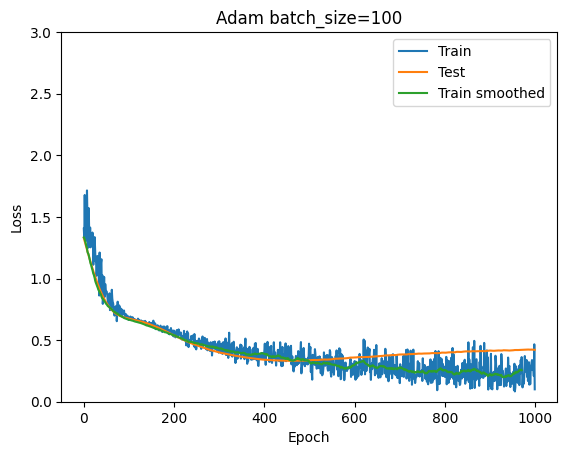

Accuracy: 0.8197
F1 Score: 0.8308
Precision: 0.8182
Recall: 0.8438
----------------------------------------
ADAM  0.0001
Epoch 100/1000, Loss: 1.0396
Epoch 200/1000, Loss: 0.7915
Epoch 300/1000, Loss: 0.6831
Epoch 400/1000, Loss: 0.6972
Epoch 500/1000, Loss: 0.7115
Epoch 600/1000, Loss: 0.5642
Epoch 700/1000, Loss: 0.7378
Epoch 800/1000, Loss: 0.4899
Epoch 900/1000, Loss: 0.4327
Epoch 1000/1000, Loss: 0.4024


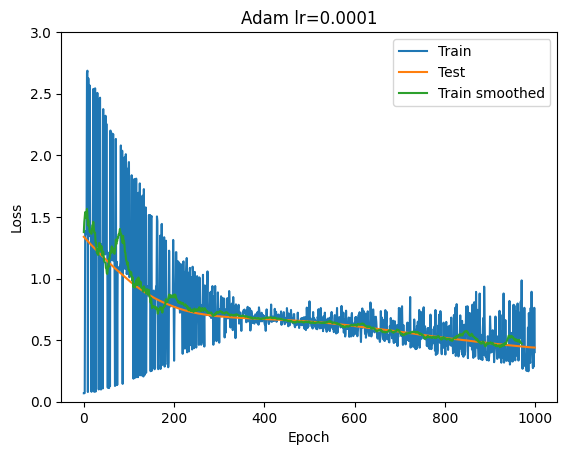

Accuracy: 0.9016
F1 Score: 0.9062
Precision: 0.9062
Recall: 0.9062
----------------------------------------

ADAM  0.01
Epoch 100/1000, Loss: 0.0303
Epoch 200/1000, Loss: 0.0178
Epoch 300/1000, Loss: 0.0205
Epoch 400/1000, Loss: 0.0285
Epoch 500/1000, Loss: 0.0101
Epoch 600/1000, Loss: 0.0013
Epoch 700/1000, Loss: 0.0039
Epoch 800/1000, Loss: 0.0008
Epoch 900/1000, Loss: 0.0026
Epoch 1000/1000, Loss: 0.0005


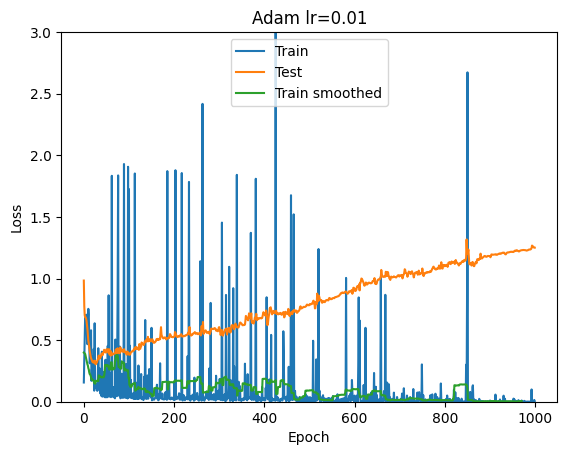

Accuracy: 0.7705
F1 Score: 0.7941
Precision: 0.7500
Recall: 0.8438
----------------------------------------

SGD  0.0001
Epoch 100/1000, Loss: 1.3276
Epoch 200/1000, Loss: 1.2663
Epoch 300/1000, Loss: 1.1568
Epoch 400/1000, Loss: 1.0820
Epoch 500/1000, Loss: 1.0190
Epoch 600/1000, Loss: 0.9755
Epoch 700/1000, Loss: 0.9264
Epoch 800/1000, Loss: 0.8975
Epoch 900/1000, Loss: 1.4354
Epoch 1000/1000, Loss: 0.8162


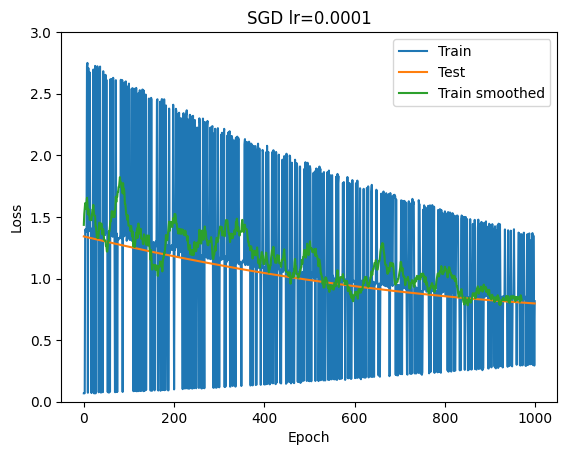

Accuracy: 0.5246
F1 Score: 0.6882
Precision: 0.5246
Recall: 1.0000
----------------------------------------

SGD 0.01
Epoch 100/1000, Loss: 0.7071
Epoch 200/1000, Loss: 0.6975
Epoch 300/1000, Loss: 0.7125
Epoch 400/1000, Loss: 0.6990
Epoch 500/1000, Loss: 0.7068
Epoch 600/1000, Loss: 0.6510
Epoch 700/1000, Loss: 0.7606
Epoch 800/1000, Loss: 0.6093
Epoch 900/1000, Loss: 0.5256
Epoch 1000/1000, Loss: 0.3543


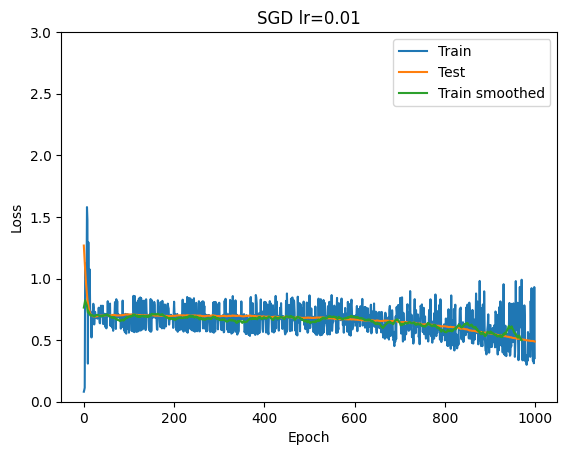

Accuracy: 0.8033
F1 Score: 0.8000
Precision: 0.8571
Recall: 0.7500
----------------------------------------

Adagrad 0.0001
Epoch 100/1000, Loss: 1.3900
Epoch 200/1000, Loss: 1.4017
Epoch 300/1000, Loss: 1.3520
Epoch 400/1000, Loss: 1.3407
Epoch 500/1000, Loss: 1.3268
Epoch 600/1000, Loss: 1.3477
Epoch 700/1000, Loss: 1.3251
Epoch 800/1000, Loss: 1.3543
Epoch 900/1000, Loss: 2.5575
Epoch 1000/1000, Loss: 1.3064


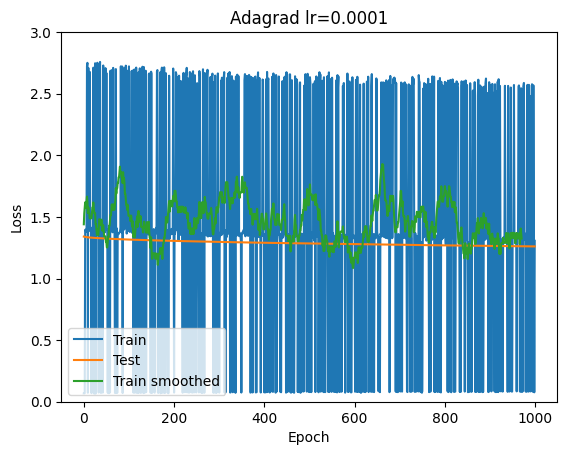

Accuracy: 0.5246
F1 Score: 0.6882
Precision: 0.5246
Recall: 1.0000
----------------------------------------

Adagrad  0.01
Epoch 100/1000, Loss: 0.5234
Epoch 200/1000, Loss: 0.3784
Epoch 300/1000, Loss: 0.6937
Epoch 400/1000, Loss: 0.8310
Epoch 500/1000, Loss: 0.9039
Epoch 600/1000, Loss: 0.1660
Epoch 700/1000, Loss: 0.5246
Epoch 800/1000, Loss: 0.1999
Epoch 900/1000, Loss: 0.2047
Epoch 1000/1000, Loss: 0.2229


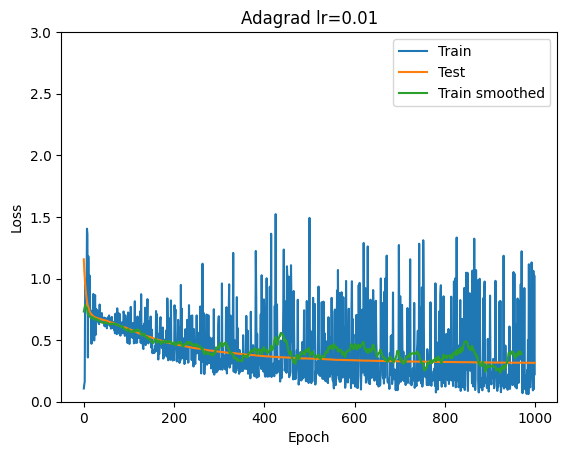

Accuracy: 0.9016
F1 Score: 0.9032
Precision: 0.9333
Recall: 0.8750
----------------------------------------


In [65]:
seed = 42
np.random.seed(seed)

import torch
import torch.nn as nn

class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        torch.manual_seed(seed)
        super(FullyConnectedNetwork, self).__init__()
        self.hidden_layers = nn.ModuleList()
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layer = nn.Linear(prev_size, hidden_size)
            torch.nn.init.normal_(layer.weight)
            self.hidden_layers.append(layer)
            prev_size = hidden_size
        self.output = nn.Linear(prev_size, output_size)
        torch.nn.init.normal_(self.output.weight)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = self.sigmoid(x)
        x = self.output(x)
        return x

def train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=1000, batch_size=30):
    torch.manual_seed(seed)
    np.random.seed(seed) 
    losses = []
    test_cost_list = []

    X_train_tensor = torch.from_numpy(X_train.values).float()
    Y_train_tensor = torch.from_numpy(Y_train.values).float()

    n_samples = X_train_tensor.shape[0]
    if batch_size > n_samples:
        batch_size = n_samples

    for epoch in range(epochs):
        random_order = torch.randperm(n_samples)
        X_shuffled = X_train_tensor[random_order]
        y_shuffled = Y_train_tensor[random_order]

        for batch_index in range(0, n_samples, batch_size):
            X_batch = X_shuffled[batch_index:batch_index + batch_size]
            y_batch = y_shuffled[batch_index:batch_index + batch_size].reshape(-1, 1)

            optimizer.zero_grad()
            y_pred = model.forward(X_batch)

            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        losses.append(loss.item())
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs.squeeze(), Y_test)
            test_cost_list.append(test_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    return losses, test_cost_list



def plot_loss(losses, title):
    train, test = losses
    plt.plot(range(epochs), train)
    plt.plot(range(epochs), test)
    plt.plot(np.convolve(train, np.ones(30)/30, mode='valid'))
    plt.legend(['Train', 'Test', 'Train smoothed'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0, 3)
    plt.show()

def evaluate_model(model, X, Y):
    with torch.no_grad():
        y_pred = model(X)
        y_pred = torch.round(torch.sigmoid(y_pred))
        acc = accuracy_score(Y, y_pred)
        f1 = f1_score(Y, y_pred)
        precision = precision_score(Y, y_pred)
        recall = recall_score(Y, y_pred)

        print(f'Accuracy: {acc:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')

hidden_layers = [8,8,8]
batch_size = 30
lr = 0.001
epochs = 1000


X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=seed)

Y_test = torch.from_numpy(Y_test.values).float()
X_test = torch.from_numpy(X_test.values).float()

criterion = nn.BCEWithLogitsLoss()


# wybranego optimizera (SGD i dwa inne)


print('SGD')
model_sgd = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
sgd = torch.optim.SGD(model_sgd.parameters(), lr=lr)
lossesSGD = train_model(model_sgd, criterion, sgd, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesSGD, 'SGD lr=0.001, batch_size=30')
evaluate_model(model_sgd, X_test, Y_test)
print('----------------------------------------')

print('Adam')
model_adam = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adam = torch.optim.Adam(model_adam.parameters(), lr=lr)
lossesAdam = train_model(model_adam, criterion, adam, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesAdam, 'Adam lr=0.001, batch_size=30')
evaluate_model(model_adam, X_test, Y_test)
print('----------------------------------------')

print('Adagrad')
model_adagrad = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adagrad = torch.optim.Adagrad(model_adagrad.parameters(), lr=lr)
lossesSGD2 = train_model(model_adagrad, criterion, adagrad, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesSGD2, 'Adagrad lr=0.001, batch_size=30')
evaluate_model(model_adagrad, X_test, Y_test)
print('----------------------------------------')




small_batch_size = 10
big_batch_size = 100

print('ADAM: batch_size', small_batch_size)
model_adam_small_batch = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adam_small_batch = torch.optim.Adam(model_adam_small_batch.parameters(), lr=lr)
lossesAdam_small_batch = train_model(model_adam_small_batch, criterion, adam_small_batch, X_train, Y_train, X_test, Y_test, epochs, small_batch_size)
plot_loss(lossesAdam_small_batch, 'Adam batch_size=10')
evaluate_model(model_adam_small_batch, X_test, Y_test)
print('----------------------------------------')

print('ADAM: batch_size', big_batch_size)
model_adam_big_batch = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adam_big_batch = torch.optim.Adam(model_adam_big_batch.parameters(), lr=lr)
lossesAdam_big_batch = train_model(model_adam_big_batch, criterion, adam_big_batch, X_train, Y_train, X_test, Y_test, epochs, big_batch_size)
plot_loss(lossesAdam_big_batch, 'Adam batch_size=100')
evaluate_model(model_adam_big_batch, X_test, Y_test)
print('----------------------------------------')

# wartości współczynnika uczenia dla różnych optimizeró

lr1 = 0.0001
lr2 = 0.01

print('ADAM ', lr1)
model_adam_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adam_lr = torch.optim.Adam(model_adam_lr.parameters(), lr=lr1)
lossesAdam_lr = train_model(model_adam_lr, criterion, adam_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesAdam_lr, 'Adam lr=0.0001')
evaluate_model(model_adam_lr, X_test, Y_test)
print('----------------------------------------')
print()
print('ADAM ', lr2)
model_adam_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adam_lr = torch.optim.Adam(model_adam_lr.parameters(), lr=lr2)
lossesAdam_lr = train_model(model_adam_lr, criterion, adam_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesAdam_lr, 'Adam lr=0.01')
evaluate_model(model_adam_lr, X_test, Y_test)
print('----------------------------------------')
print()
print('SGD ', lr1)
model_sgd_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
sgd_lr = torch.optim.SGD(model_sgd_lr.parameters(), lr=lr1)
lossesSGD_lr = train_model(model_sgd_lr, criterion, sgd_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesSGD_lr, 'SGD lr=0.0001')
evaluate_model(model_sgd_lr, X_test, Y_test)
print('----------------------------------------')
print()
print('SGD', lr2)
model_sgd_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
sgd_lr = torch.optim.SGD(model_sgd_lr.parameters(), lr=lr2)
lossesSGD_lr = train_model(model_sgd_lr, criterion, sgd_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesSGD_lr, 'SGD lr=0.01')
evaluate_model(model_sgd_lr, X_test, Y_test)
print('----------------------------------------')
print()
print('Adagrad' , lr1)
model_adagrad_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adagrad_lr = torch.optim.Adagrad(model_adagrad_lr.parameters(), lr=0.0001)
lossesAdagrad_lr = train_model(model_adagrad_lr, criterion, adagrad_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesAdagrad_lr, 'Adagrad lr=0.0001')
evaluate_model(model_adagrad_lr, X_test, Y_test)
print('----------------------------------------')
print()
print('Adagrad ', lr2)
model_adagrad_lr = FullyConnectedNetwork(input_size=22, hidden_sizes=hidden_layers, output_size=1)
adagrad_lr = torch.optim.Adagrad(model_adagrad_lr.parameters(), lr=0.01)
lossesAdagrad_lr = train_model(model_adagrad_lr, criterion, adagrad_lr, X_train, Y_train, X_test, Y_test, epochs)
plot_loss(lossesAdagrad_lr, 'Adagrad lr=0.01')
evaluate_model(model_adagrad_lr, X_test, Y_test)
print('----------------------------------------')

W ćwiczeniu należy zbudować sieć o tych samych parametrach co w zadaniu
poprzednim, i ocenić jej działanie na tych samych danych, tym razem sprawdzając
wpływ:
* wybranego optimizera (SGD i dwa inne)
* rozmiaru batcha
* wartości współczynnika uczenia dla różnych optimizeró